In [1]:
import numpy as np
import pandas as pd
import pyodbc
import sqlalchemy
import sqlite3
from subprocess import check_output
import os
from IPython.core.display import Image, display

from sqlalchemy import create_engine
engine = create_engine('sqlite:////...', echo=False)

## 1. Introduction to `data-driven` decision making
$\diamond$ **`Aim` of this `course`**

$\qquad \bullet$ A short review of `SQL` know-how.

$\qquad \bullet$ Apply your `SQL` know-how to the business insights from data.

$\qquad \bullet$ Learn about `SQL` statements to summarize data,

$\qquad \quad \circ$ [OLAP](https://github.com/Nhan121/Lectures_notes-teaching-in-VN-/blob/master/SQL%20practices/Track:%20SQL%20for%20Database%20Administrators/Course2:%20Database%20Design/processing-storing-and-organizing-data.ipynb) extensions were developed specifically for business intelligence.

$\qquad \quad \circ$ For instance, `CUBE`, `ROLL UP` and `GROUPING SETS`.

$\diamond$ **`MOVIE NOW 's structure`: an online movie rental company.**

$\qquad \bullet$ `Platform` to `steam` the `movies`.

$\qquad \bullet$ `Additional information` for each movie: `genre`, `main actors`, `etc`.

$\qquad \bullet$ `Customer information`.

$\qquad \bullet$ `Customer` can give a `rating` after watching a movie.

$\qquad \bullet$ **`Data structure`**

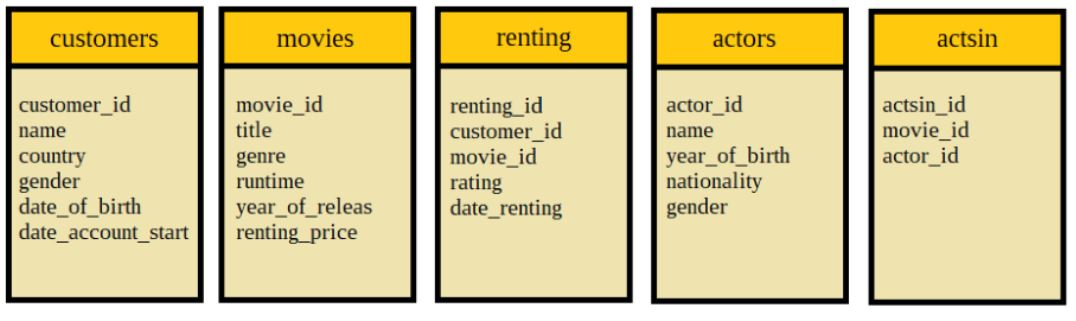

In [2]:
### 

$\diamond$ **`OBJECTIVE` of `data-driven` decision making.**

$\qquad \bullet$ `Information` for the `operational decisions`.

$\qquad \quad \circ$ `Popularity` of `actors` to decide **which `movie` to invest in?**

$\qquad \quad \circ$ `Revenue` of the `last month` to **estimate** the `budget` for the **`short-term investments`**

$\diamond$ `Information` for the `strategic decisions`.

$\qquad \quad \circ$ `Success` across `countries` to **decide on** the **`market extension`**.

$\qquad \quad \circ$ **`Long-term development`** of the `revenue` for **`long-term investments`**

$\diamond$ **`KPIs`: KEY PERFORMANCE INDICATORS.**

$\quad$ `Extract information` from the data which is `relevant` to `measure` the `success` of `MOVIE NOW`

$\qquad \quad \circ$ *Total number* of `rentals`: **`revenue`**.

$\qquad \quad \circ$ The `average rating` of all `movies`: **`customer satisfaction`**.

$\qquad \quad \circ$ *Number* of the `active customer`: **`customer engagement`**

### EXERCISEs.
#### Exercise 1.1. Exploring the database
$\qquad$ Explore the tables and its columns. **Which of the following `quantities` can't be computed?**

- `A`. The number of `customers` from each `country`.
- `B`. The number of `movies` with an international award.
- `C`. The average `rating` of a movie.
- `D`. The number of `movies` with the `actor` Daniel Radcliffe.

$\diamond$ Fistly, look at the first 5 lines in each database: `customers`, `movies`, and `actors` before answer the question!

**`customers`**

customer_id|name|country|gender|date_of_birth|date_account_start
:-|:-|:-|:-|:-|:-
2|Wolfgang Ackermann|Austria|male|1971-11-17|2018-10-15
3|Daniela Herzog|Austria|female|1974-08-07|2019-02-14
4|Julia Jung|Austria|female|1991-01-04|2017-11-22
5|Juliane Kirsch|Austria|female|1977-03-01|2018-12-16
6|Rowanne Couperus|Belgium|female|1994-04-05|2018-08-26
...| ...

`(122 rows)`

**`movies`**

movie_id|title|genre|runtime|year_of_release|renting_price
:-|:-|:-|:-|:-|:-
1|One Night at McCool's|Comedy|93|2001|2.09
2|Swordfish|Drama|99|2001|2.19
3|What Women Want|Comedy|127|2001|2.59
4|Training Day|Drama|122|2001|1.79
5|The Fellowship of the Ring|Science Fiction & Fantasy|178|2001|2.59
...| ...

`(71 rows)`

**`actors`**

actor_id|name|year_of_birth|nationality|gender
:-|:-|:-|:-|:-
1|Abbie Cornish|1982|Australia|female
2|Adam Sandler|1966|USA|male
3|Al Pacino|1940|USA|male
4|Amy Adams|1974|USA|female
5|Andrea Riseborough|1981|British|female
...| ...

`(145 rows)`


$\diamond$ **Answers & comments.**

- *A. Wrong!!* The `country` column is in the table `customers`.
- **B. Correct!!!**  There is no information about movie awards in the data.
- *C. Incorrect!!* The `rating` of `movies` is in the table `renting`, **not `movies`**.
- *D. Wrong!!* This quantity can be computed. You need to combine information from table `actors` and table `actsin`.

**`actsin`**

actsin_id|movie_id|actor_id
:-|:-|:-
1|37|1
2|56|2
3|10|3
4|14|3
5|29|3
...|...

`(213 rows)`

#### Exercise 1.2. Exploring the table renting
$\qquad$ The table `renting` includes all records of movie rentals. Each record has a unique ID `renting_id`. It also contains information about customers (`customer_id`) and which movies they watched (`movie_id`). Furthermore, customers can give a rating after watching the movie, and the day the movie was rented is recorded.

#### Instructions.
**Step 1.** Select all columns from `renting`.

**SOLUTION.**

                    SELECT * FROM renting
- **`query result`.**

renting_id|customer_id|movie_id|rating|date_renting
:-|:-|:-|:-|:-
1|41|8|null|2018-10-09
2|10|29|10|2017-03-01
3|108|45|4|2018-06-08
4|39|66|8|2018-10-22
5|104|15|7|2019-03-18
...|...
574|7|14|null|2019-02-08
575|45|31|10|2018-06-09
576|38|25|null|2018-09-02
577|35|65|9|2017-07-03
578|35|16|null|2017-06-20

`(578 rows)`

**Step 2.** Now select only those columns from `renting` which are needed to calculate the average `rating` per `movie`.

**SOLUTION.**

                SELECT movie_id, rating
                FROM renting;

**Step 3.** In `SQL` missing values are coded with null. In which column of renting did you notice null values?

- `A`. `renting_id`
- `B`. `customer_id`
- `C`. `movie_id`
- `D`. `rating`

**Answers & comments.**
- *A. Wrong!!* In this table, the `renting_id` is the `unique identifier` of the records and therefore cannot be `null`.
- *B. Incorrect!!* Each movie rental is associated with exactly one customer, so `customer_id` is never `null`.
- *C. Wrong!!* Each movie rental is associated with exactly one movie, so `movie_id` is never `null`.
- **D. Correct!!!** The column `rating` in the `renting` table has a lot of null values since not every customer gives a rating after watching a movie.

## 2. Filtering and ordering
### Filtering with `WHERE`
In `SQL`, we can filter a certain condition by using `WHERE` command,

$\qquad$ For instance, select all customers `from Italy`!

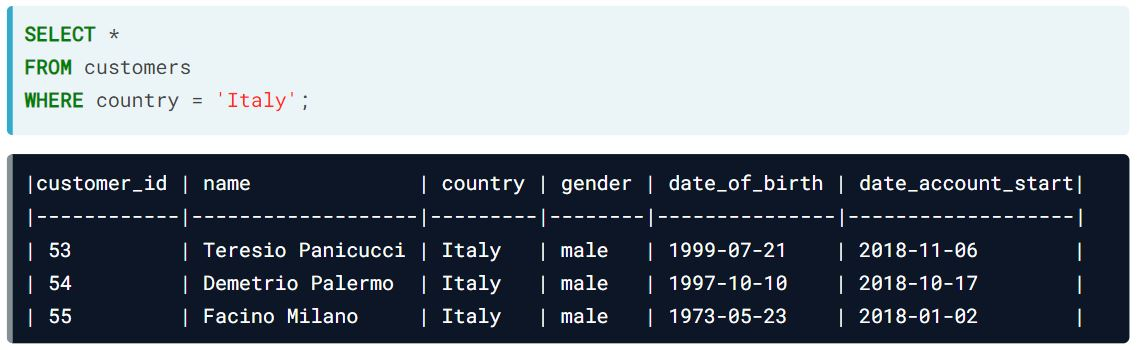

In [3]:
### 

$\qquad \diamond$ **Operators in the `WHERE` clause.**

$\quad \qquad \bullet$ **`COMPARISION`.** For instance, 

$\qquad \quad \qquad \circ$ **Greater than & less than.** `> (greater)`; `< (less)`

$\qquad \quad \qquad \circ$ **Equal & not equal.** `<>` or `!=`: `not equal`; `= (equal)`

$\qquad \quad \qquad \circ$ **Greater / less than or equal.** `>= (greater than or equal)`; `<= (less than or equal)`

$\quad \qquad \bullet$ **`BETWEEN` clause.** To restrict the values in a range of values, for instance

$\qquad \quad \qquad \circ$ `WHERE age BETWEEN 18 AND 45`: limit the `age` in the interval `[18, 45]`.

$\quad \qquad \bullet$ **`IN`.** To filter the values in a discreate cases, such as

$\qquad \quad \qquad \circ$ `WHERE language IN ('English', 'Spanish', 'French')`: filter the `languages` is one of `English`, `French` or `Spanish`

$\quad \qquad \bullet$ **`IS NULL` & `IS NOT NULL`.** To extract or exclude the `NULL` values, for example

$\qquad \quad \qquad \circ$ `WHERE salary IS NULL`: filter `NULL` values of `salary` column.

$\qquad \quad \qquad \circ$ `WHERE salary IS NOT NULL`: exclude the `NULL` values of `salary` column.

$\quad \qquad \bullet$ **`BOOLEAN:` `AND`, `OR`** To express the `multiple filter conditions`, for instance,

$\qquad \quad \qquad \circ$ `WHERE (age BETWEEN 18 AND 45) AND (country IN ('UK', 'Japan'))`: Filter the object in the `age` of `18` to `45` **and** come from `UK` or `Japan`.

### `ORDER` result.

$\quad \diamond$ We have 2 types of `arrangement`: `descending (DESC)` or `ascending (ASC)`,

$\quad \qquad \bullet$ `ORDER BY column_name`: meant `ORDER BY column_name ASC`

$\qquad \qquad \circ$ The `numeric data`; e.g., `ORDER BY age` meant `arrange` the `age` from `youngest` to `oldest`

$\qquad \qquad \circ$ The `text data`; e.g., `ORDER BY first_name` meant `arrange` the `first_name` in `alphabetically: A to Z`

$\qquad \qquad \circ$ The `text date/time`; e.g., `ORDER BY date_created` meant `arrange` the `date_created` from the `started_date` to the `ended_date`.

$\quad \qquad \bullet$ `ORDER BY column_name DESC`.

### EXERCISEs.
#### Exercise 2.1. Working with dates
$\qquad$ For the analysis of monthly or annual changes, it is important to select data from specific time periods. You will select records from the table `renting` of `movie rentals`. 

The format of dates is `'YYYY-MM-DD'`.

#### Instructions
**Step 1.** Select all `movies` rented on `October 9th, 2018`.

**SOLUTION.**

                SELECT * FROM renting
                WHERE date_renting = '2018-10-09'; -- Movies rented on October 9th, 2018
- **`query result`.**

renting_id|customer_id|movie_id|rating|date_renting
:-|:-|:-|:-|:-
1|41|8|null|2018-10-09
6|50|71|7|2018-10-09

**Step 2.** Select all records of `movie rentals` between beginning of `April 2018` till end of `August 2018`.

**SOLUTION.**

                SELECT * FROM renting
                WHERE date_renting BETWEEN '2018-04-01' AND '2018-08-31'; -- from beginning April 2018 to end August 2018
- **`query result`.**

renting_id|customer_id|movie_id|rating|date_renting
:-|:-|:-|:-|:-
3|108|45|4|2018-06-08
8|73|65|10|2018-06-05
12|52|65|10|2018-06-29
14|8|29|null|2018-08-03
16|59|59|null|2018-08-12
...|...|...
561|113|36|5|2018-06-29
563|29|5|null|2018-05-11
566|28|45|7|2018-05-29
569|78|26|null|2018-08-16
575|45|31|10|2018-06-09

`(108 rows)`

**Step 3.** Put the most recent records of movie rentals on top of the resulting table and order them in `decreasing order`.

**SOLUTION.**

                    SELECT * FROM renting
                    WHERE date_renting BETWEEN '2018-04-01' AND '2018-08-31'
                    ORDER BY date_renting; -- Order by recency in decreasing order
- **`query result`.**

renting_id|customer_id|movie_id|rating|date_renting
:-|:-|:-|:-|:-
218|94|34|6|2018-04-03
207|52|25|5|2018-04-03
303|121|58|null|2018-04-04
57|25|29|6|2018-04-05
28|113|40|7|2018-04-05
...|...
258|65|44|8|2018-08-28
39|25|52|null|2018-08-28
551|86|13|8|2018-08-29
279|21|62|null|2018-08-30
76|112|10|null|2018-08-31

`(108 rows)`
- **Comments.** You know now how to select data from specific time periods and how to order them by `date`.

#### Exercise 2.2. Selecting movies
$\qquad$ The table `movies` contains all `movies` available on the `online platform`.

#### Instructions
**Step 1.** Select all `movies` which are not `dramas`.

**SOLUTION.**

                SELECT * FROM movies
                WHERE genre != 'Drama'; -- All genres except drama
- **`query result`.**

movie_id|title|genre|runtime|year_of_release|renting_price
:-|:-|:-|:-|:-|:-
1|One Night at McCool's|Comedy|93|2001|2.09
3|What Women Want|Comedy|127|2001|2.59
5|The Fellowship of the Ring|Science Fiction & Fantasy|178|2001|2.59
6|Harry Potter and the Philosopher's Stone|Science Fiction & Fantasy|152|2001|2.69
7|The Royal Tenenbaums|Comedy|110|2002|1.89
...|...
63|Django Unchained|Other|165|2012|2.69
65|Ghost Rider: Spirit of Vengeance|Action & Adventure|96|2012|1.79
68|The Company You Keep|Mystery & Suspense|125|2013|2.39
69|The Frozen Ground|Mystery & Suspense|105|2013|2.49
71|Rio 2|Animation|101|2014|1.79

(`35 rows`)

**Step 2.** Select the movies `'Showtime', 'Love Actually'` and `'The Fighter'`.

**SOLUTION.**

                SELECT * FROM movies
                WHERE title IN ('Showtime', 'Love Actually', 'The Fighter'); -- Select all movies with the given titles
- **`query result`.**

movie_id|title|genre|runtime|year_of_release|renting_price
:-|:-|:-|:-|:-|:-
11|Showtime|Comedy|95|2002|1.79
20|Love Actually|Comedy|135|2003|2.29
53|The Fighter|Other|116|2010|2.49


**Step 3.** Order the `movies` by `increasing renting price`.

**SOLUTION.**

                        SELECT * FROM movies
                        ORDER BY renting_price ASC ; -- Order the movies by increasing renting price
- **`query result`.**

movie_id|title|genre|runtime|year_of_release|renting_price
:-|:-|:-|:-|:-|:-
42|No Country for Old Men|Drama|122|2007|1.49
37|Candy|Drama|116|2006|1.59
16|25th Hour|Drama|135|2003|1.59
33|V for Vendetta|Drama|132|2006|1.59
36|World Trade Center|Drama|129|2006|1.59
...|...
32|A Good Woman|Drama|93|2006|2.89
25|Bridget Jones - The Edge of Reason|Drama|108|2004|2.89
24|Welcome to Mooseport|Comedy|110|2004|2.89
51|Morning Glory|Comedy|107|2010|2.99
9|11'09''01 September 11|Drama|134|2002|2.99

`(71 rows)`


#### Exercise 2.3. Select from renting
$\qquad$ Only some users give a rating after watching a movie. Sometimes it is interesting to explore only those movie rentals where a `rating` was provided.

#### Instructions
- Select from table `renting` all `movie rentals` from 2018.
- Filter only those records which have a `movie rating`.

**SOLUTION.**

                    SELECT * FROM renting
                    WHERE date_renting BETWEEN '2018-01-01' AND '2018-12-31' -- Renting in 2018
                        AND rating IS NOT NULL; -- Rating exists
- **`query result`.**

renting_id|customer_id|movie_id|rating|date_renting
:-|:-|:-|:-|:-
3|108|45|4|2018-06-08
4|39|66|8|2018-10-22
6|50|71|7|2018-10-09
8|73|65|10|2018-06-05
12|52|65|10|2018-06-29
...|...
561|113|36|5|2018-06-29
565|63|53|10|2018-10-25
566|28|45|7|2018-05-29
571|92|28|9|2018-11-22
575|45|31|10|2018-06-09

`(163 rows)`

- **Comments.** You selected all records from renting which are `not null` for 2018. Now you are ready for the next step: `Aggregation`!

## 3. Aggregations - summarizing data.
### 3.1 Some `Aggregation` function in `SQL`

                    AVG(), SUM(), COUNT(), MIN(), MAX()
                    
$\diamond$ When using the `aggregation` functions; you can include the `NULL` values in many cases. 

$\diamond$ For example (in the image below), 

$\qquad \bullet$ `COUNT(*)` returns `145` indicates that the `actors` table has total `145 rows`, while

$\qquad \bullet$ `COUNT(name)` returns `145` meant **there is not any `Null` values** of the column `name` in `actors` table.

$\qquad \bullet$ `COUNT(year_of_birth)` return `143` meant **there are exactly `2``Null` values** in the column `year_of_birth`

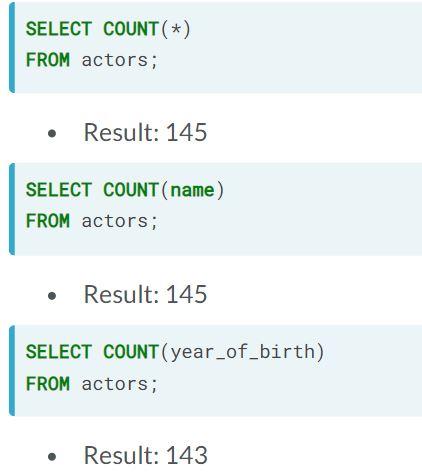

In [4]:
### 

### 3.2. `DISTINCT` for the `unique` values of the columns.

$\qquad$ For example (below), there are `11` unique values in the `country` columns of `customer` table. Of course, these `11 country_names` is `different` each other.

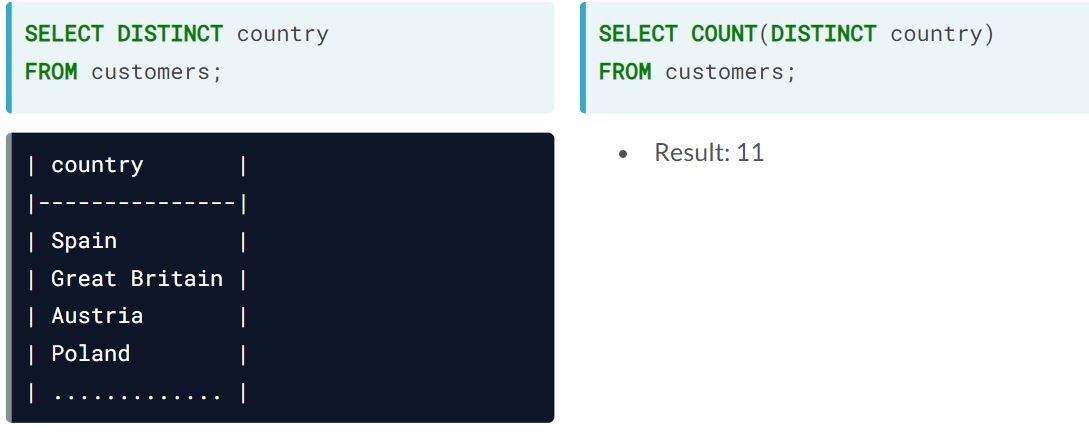

In [5]:
### 

$\qquad$ `DISTINCT` with `NULL` values! The `DISTINCT` returns the `unique` values, **including `null`**

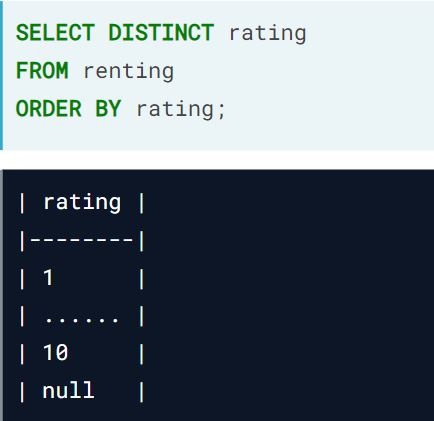

In [6]:
### 
Image(r"C:\Users\Admin\Desktop\fig5.JPG", width = 230, height = 590)

$\qquad$ Finally and may be you have already known! Give an `alias (AS)` to the `column_name`! This helps to understand the results when the `column_name` are **`self-explaining`.**

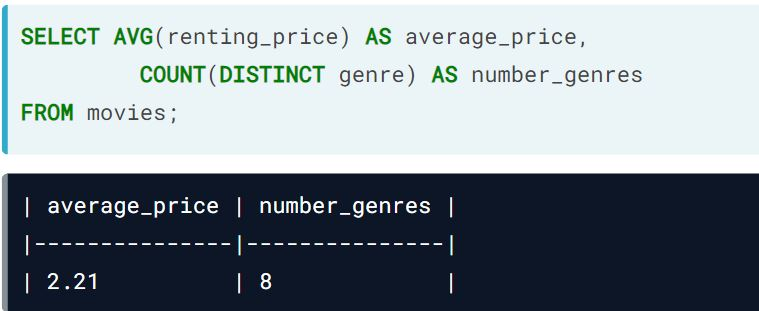

In [7]:
### 

### EXERCISEs.
#### Exercise 3.1. Summarizing customer information
In most business decisions customers are analyzed in groups, such as customers per country or customers per age group.

#### Instructions 
**Step 1.** Count the number of `customers` born in the `80s`.

**SOLUTION.**

                            SELECT COUNT(*) FROM customers
                            WHERE date_of_birth BETWEEN '1980-01-01' AND '1989-12-31';
- **`query result`.**

| count |
|:-:|
| 33 |

**Step 2.** Count the number of `customers` from `Germany`

**SOLUTION.**

                        SELECT COUNT(customer_id) FROM customers
                        WHERE country = 'Germany'
- **`query result`.**

| count |
|:-:|
| 0 |

**Step 3.** Count the number of `countries` where MovieNow has `customers`.

**SOLUTION.**

                        SELECT COUNT(DISTINCT country)   -- Count the number of countries
                        FROM customers;
- **`query result`.**

| count |
|:-:|
| 11 |

- **Comments.** You aggregated data from the `customers` table and figured out that `MovieNow` has customers in `11 countries` and that there are `no customers` from `Germany`.

#### Exercise 3.2. Ratings of movie 25
$\qquad$ The `movie ratings` give us insight into the preferences of our `customers`. Report **summary statistics**, such as the `minimum`, `maximum`, `average`, and `count`, of `ratings` for the movie with `ID 25`.

#### Instructions
- Select `all movie rentals` of the `movie` with `movie_id 25` from the table `renting`.
- For those records, calculate the `minimum`, `maximum` and `average` `rating` and `count` the number of ratings for this movie.

**SOLUTION.**

                    SELECT MIN(rating) AS min_rating, -- Calculate the minimum rating and use alias min_rating
                           MAX(rating) AS max_rating, -- Calculate the maximum rating and use alias max_rating
                           AVG(rating) AS avg_rating, -- Calculate the average rating and use alias avg_rating
                           COUNT(rating) AS number_ratings -- Count the number of ratings and use alias number_ratings
                    FROM renting
                    WHERE movie_id = 25
- **`query result`.**

min_rating|max_rating|avg_rating|number_ratings
:-|:-|:-|:-
5|10|7.5000000000000000|8

- **Comments.** You summarized the `ratings` for the `movie 25` and used meaningful column names. This movie has `8 ratings` with `minimum 5`, `maximum 10` and `average 7.5 rating`.

#### Exercise 3.3. Examining annual rentals
$\qquad$ You are asked to provide a report about the development of the company. Specifically, your manager is interested in the total number of `movie rentals`, the `total number` of `ratings` and the `average rating` of all movies since the `beginning of 2019`.

#### Instructions.
**Step 1.** First, select all records of movie rentals since January 1st 2019.

**SOLUTION.**

                    SELECT * FROM renting
                    WHERE date_renting >= '2019-01-01'
- **`query result`.**

renting_id|customer_id|movie_id|rating|date_renting
:-|:-|:-|:-|:-
5|104|15|7|2019-03-18
17|22|46|10|2019-02-16
18|36|39|10|2019-03-20
27|7|36|null|2019-03-14
32|8|42|10|2019-02-13
...|...
560|11|49|6|2019-04-18
562|33|18|null|2019-03-10
567|28|49|8|2019-02-24
572|4|61|6|2019-04-16
574|7|14|null|2019-02-08

`(159 rows)`

**Step 2.** Now, count the number of movie rentals and calculate the average rating `since` the `beginning of 2019`.

**SOLUTION.**

                            SELECT COUNT(*), AVG(rating)
                            FROM renting
                            WHERE date_renting >= '2019-01-01';
- **`query result`.**

| count | avg |
|:-|:-|
|159 | 7.9462365591397849 |

**Step 3.** Use as **`alias`** column names `number_renting` and `average_rating` respectively.

**SOLUTION.**

                    SELECT 
                        COUNT(*) AS number_renting, -- Give it the column name number_renting
                        AVG(rating) AS average_rating  -- Give it the column name average_rating
                    FROM renting
                    WHERE date_renting >= '2019-01-01';
- **`query result`.**

| number_renting | average_rating |
|:-|:-|
|159 | 7.9462365591397849 |

**Step 4.** Finally, count how many ratings exist `since 2019-01-01`.

**SOLUTION.**

                        SELECT 
                            COUNT(*) AS number_renting,
                            AVG(rating) AS average_rating, 
                            COUNT(rating) AS number_ratings -- Add the total number of ratings here.
                        FROM renting
                        WHERE date_renting >= '2019-01-01';
- **`query result`.**

| number_renting | average_rating | number_ratings |
|:-|:-|:-|
|159 | 7.9462365591397849 | 93 |

- **Comments.** You managed to extract all `KPIs` from the renting records by working with `aggregations`, `NULL` values and `dates`.